# Exercise


* 请探索当当网的书籍热销榜数据。（可使用任何Python三方库，提交代码时请转为 pdf）

数据集名称：dangdang_books.csv

# 0. 观察数据集

In [1]:

import pandas as pd

In [3]:
df = pd.read_csv('dangdang_books.csv', encoding='utf-8')
df.set_index('index', inplace=True)
df.head()

,title,reviews,recommends(%),authors,publisher,price_n,price_r
index,,,,,,,
1,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,37619,99.9,梁晓声,中国青年出版社,154.7,238.0
2,遥远的救世主（天道原著王志文主演电视剧畅销遥远的救世主作者豆豆三部曲之一）,275993,99.8,豆豆,作家出版社,24.0,48.0
3,万物小历史 和爸妈读万物科学简史 给孩子的万物科普绘本 成长,58387,100.0,张玉光,北京联合出版有限公司,34.0,40.0
4,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,976335,100.0,罗伯特・戴博德,天津人民出版社,26.0,38.0
5,被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎,518799,100.0,岸��一郎,机械工业出版社,41.2,55.0


In [5]:
df

,title,reviews,recommends(%),authors,publisher,price_n,price_r
index,,,,,,,
1,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,37619,99.9,梁晓声,中国青年出版社,154.7,238.0
2,遥远的救世主（天道原著王志文主演电视剧畅销遥远的救世主作者豆豆三部曲之一）,275993,99.8,豆豆,作家出版社,24.0,48.0
3,万物小历史 和爸妈读万物科学简史 给孩子的万物科普绘本 成长,58387,100.0,张玉光,北京联合出版有限公司,34.0,40.0
4,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,976335,100.0,罗伯特・戴博德,天津人民出版社,26.0,38.0
5,被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎,518799,100.0,岸��一郎,机械工业出版社,41.2,55.0
...,...,...,...,...,...,...,...
496,安的种子,210132,99.2,王早早,海燕出版社,13.4,29.8
497,米小圈漫画成语（第二辑）（套装共5册）,3332,100.0,北猫,四川少年儿童出版社,60.0,120.0
498,人间好玩（当当专享印刷蔡澜先生亲题寄语，“八旬”蔡澜的人生智慧书。汪涵、大张伟赞赏的“师傅”...,56799,100.0,蔡澜,湖南文艺出版社,18.7,48.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          500 non-null    object 
 1   reviews        500 non-null    int64  
 2   recommends(%)  500 non-null    float64
 3   authors        500 non-null    object 
 4   publisher      500 non-null    object 
 5   price_n        500 non-null    float64
 6   price_r        500 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 31.2+ KB


In [5]:
df['price_r'].describe()

count    500.000000
mean      68.682800
std       68.264717
min       15.000000
25%       38.000000
50%       49.000000
75%       68.000000
max      698.000000
Name: price_r, dtype: float64

## 1. 书籍评分

In [9]:
df[df[['title', 'authors']].duplicated(keep=False)]

,title,reviews,recommends(%),authors,publisher,price_n,price_r
index,,,,,,,
110,围城,1175991,99.8,钱钟书,人民文学出版社,22.0,39.0
362,围城,203109,99.8,钱钟书,人民文学出版社,28.4,36.0


In [11]:
#聚合操作
data = df.groupby(['title', 'authors', 'publisher'],
                  as_index=False)[['reviews', 'recommends(%)']].mean()
data

,title,authors,publisher,reviews,recommends(%)
0,0-3岁宝宝大脑开发游戏书（亲子育儿，新手妈妈学习书）,柳泽弘树,哈尔滨出版社,34130,100.0
1,0-4岁幼儿认知小百科（全3册),吉田纯子,长江少年儿童出版社,501243,99.7
2,100层的房子系列（全4册，《100层的房子》+《地下100层的房子》+《海底100层的房子...,岩井俊雄,北京科学技术出版社,217652,100.0
3,10分钟爱上数学 我是学霸 培养孩子的学霸数学思维,项华,北京联合出版有限公司,3144,100.0
4,365夜睡前故事（全4册） 宝宝睡前故事书0-3-6岁幼儿故事书早教配图 婴儿绘本书籍 [0...,青葫芦,福建科技出版社,64889,99.9
...,...,...,...,...,...
494,马尔克斯：百年孤独（50周年纪念版）,加西亚・马尔克斯,南海出版公司,2028686,99.8
495,高效能人士的七个习惯（30周年纪念版）（全新增订版）（新增《纽约时报》畅销肖恩・柯维全新观点...,史蒂芬・柯维,中国青年出版社,241509,100.0
496,鬓边不是海棠红,水如天儿,中国致公出版社,4942,99.9
497,鸭子骑车记,大卫・香农,新星出版社,274869,99.9


根据用户的评分，对书籍进行排序

In [12]:
data.sort_values(by='recommends(%)', ascending=False).head(10)

,title,authors,publisher,reviews,recommends(%)
0,0-3岁宝宝大脑开发游戏书（亲子育儿，新手妈妈学习书）,柳泽弘树,哈尔滨出版社,34130,100.0
333,没头脑和不高兴（任溶溶编著彩色注音版）,任溶溶,安徽少年儿童出版社,72978,100.0
282,放学后（东野圭吾成名作）,东野圭吾,南海出版公司,326687,100.0
280,挪威的森林,村上春树,上海译文出版社,353574,100.0
279,拼音真好玩（全彩6册）（从幼小衔接到一年级，拼音学习启蒙书，附赠超实用拼音全表） 小猛犸童书出品,周霞,电子工业出版社,249895,100.0
278,把妈妈的话装进耳朵里,玛尔塔・帕拉雷斯,北京科学技术出版社,120071,100.0
277,把坏脾气收起来,卡罗尔・罗思,北京科学技术出版社,318843,100.0
275,房思琪的初恋乐园 （豆瓣9.2高分！数百万读者强烈共鸣的文学绝唱）,林奕含,北京联合出版有限公司,468889,100.0
274,戴老师魔性诗词课,戴建业,北京联合出版有限公司,69627,100.0
273,我的野生动物朋友：精装珍藏版,蒂皮・德格雷,接力出版社,141251,100.0


In [13]:
m = df['reviews'].min()  # 数据集的最小评分量
C = df['recommends(%)'].mean()  # 数据集的平均评分


def weight_rating(data, m=m, C=C):
    R = data['recommends(%)']
    v = data['reviews']
    return v / (v + m) * R + m / (v + m) * C

In [14]:
df['weighted_rating'] = df.apply(weight_rating, axis=1)
df

,title,reviews,recommends(%),authors,publisher,price_n,price_r,weighted_rating
index,,,,,,,,
1,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,37619,99.9,梁晓声,中国青年出版社,154.7,238.0,99.899958
2,遥远的救世主（天道原著王志文主演电视剧畅销遥远的救世主作者豆豆三部曲之一）,275993,99.8,豆豆,作家出版社,24.0,48.0,99.800012
3,万物小历史 和爸妈读万物科学简史 给孩子的万物科普绘本 成长,58387,100.0,张玉光,北京联合出版有限公司,34.0,40.0,99.999889
4,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,976335,100.0,罗伯特・戴博德,天津人民出版社,26.0,38.0,99.999993
5,被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎,518799,100.0,岸��一郎,机械工业出版社,41.2,55.0,99.999988
...,...,...,...,...,...,...,...,...
496,安的种子,210132,99.2,王早早,海燕出版社,13.4,29.8,99.200156
497,米小圈漫画成语（第二辑）（套装共5册）,3332,100.0,北猫,四川少年儿童出版社,60.0,120.0,99.998084
498,人间好玩（当当专享印刷蔡澜先生亲题寄语，“八旬”蔡澜的人生智慧书。汪涵、大张伟赞赏的“师傅”...,56799,100.0,蔡澜,湖南文艺出版社,18.7,48.0,99.999886


根据新的打分标准对书籍进行从高到低的排名

In [15]:
df.groupby(['title', 'authors', 'publisher'],
           as_index=False)['weighted_rating'].mean().sort_values(
    by='weighted_rating', ascending=False).head(10)

,title,authors,publisher,weighted_rating
321,正面管教(修订版),简・尼尔森,北京联合出版公司,99.999997
88,作家榜经典：月亮与六便士（全新未删节插图珍藏版！毛姆写给年轻人的梦想之书！满地都是六便士，他...,毛姆,浙江文艺出版社,99.999995
60,云边有个小卖部（陆定昊诚挚推荐，随书附赠云边镇四季明信片和张嘉佳作词单曲彩蛋）,张嘉佳,湖南文艺出版社,99.999995
91,你当像鸟飞往你的山（中文版销量超200万册，比尔・盖茨年度特别推荐！登顶《纽约时报》畅销榜8...,塔拉,南海出版公司,99.999995
463,追风筝的人（李雪琴、高圆圆动情推荐，《纽约时报》畅销书榜上榜超100周）,卡勒德・胡赛尼,上海人民出版社,99.999994
439,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,罗伯特・戴博德,天津人民出版社,99.999993
235,平凡的世界：全三册（全新2021版，茅盾文学奖获奖作品，激励青年的不朽经典）,路遥,北京十月文艺出版社,99.999993
272,我的第一本地理启蒙书,郑利强,新世界出版社,99.999993
68,人生海海（麦家重磅力作，莫言、董卿盛赞，连续两年高居畅销榜，发行量超200万册）,麦家,北京十月文艺出版社,99.999992
487,霍乱时期的爱情（《百年孤独》作者马尔克斯传世巨著，展示爱情的所有可能）,哥伦比亚,南海出版公司,99.999992


## 2. 书籍价格

In [4]:
df.head()

,title,reviews,recommends(%),authors,publisher,price_n,price_r
index,,,,,,,
1,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,37619,99.9,梁晓声,中国青年出版社,154.7,238.0
2,遥远的救世主（天道原著王志文主演电视剧畅销遥远的救世主作者豆豆三部曲之一）,275993,99.8,豆豆,作家出版社,24.0,48.0
3,万物小历史 和爸妈读万物科学简史 给孩子的万物科普绘本 成长,58387,100.0,张玉光,北京联合出版有限公司,34.0,40.0
4,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,976335,100.0,罗伯特・戴博德,天津人民出版社,26.0,38.0
5,被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎,518799,100.0,岸��一郎,机械工业出版社,41.2,55.0


打折后最贵的十本书

In [51]:
price_df = df.groupby(['title', 'authors', 'publisher'],
                      as_index=False)['price_n'].mean().sort_values(
    by='price_n', ascending=False).head(10)
price_df

,title,authors,publisher,price_n
294,明朝那些事儿增补版.全集（全新印签版）,当年明月,北京联合出版有限公司,393.0
349,熊津数学图画书（全50册，含29册精装绘本及21册游戏书，将数学和故事、游戏相结合，使儿童在...,熊津出版社,贵州科技出版社,349.0
189,如果历史是一群喵1-9全集（套装共9册）,肥志,广东旅游出版社,336.6
149,哈利・波特（套装1-7册） (平装)《语文》教材推荐阅读书目，外国儿童文学经典，新英国版封面平装版,J.K.罗琳,人民文学出版社,271.6
219,小羊上山儿童汉语分级读物（第1级、2级、3级）(30册套装),孙蓓,人民邮电出版社,227.0
110,写给儿童的中国历史（中国孩子的历史启蒙，真正写给孩子看的中国通史，全彩铜版14册）,陈卫平,新世界出版社,177.5
129,原声触摸发声书：听，什么声音（套装全6册）,YOYO出版社,开明出版社,165.0
200,宫西达也“你肯定能行”绘本（全18册）,宫西达也,青岛出版社,159.0
154,国家地理百科全书合辑 中国 环球 套装共20册,张妙弟,北京联合出版公司,155.2
64,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,梁晓声,中国青年出版社,154.7


In [52]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['font.sans-serif'] = 'simhei'

D:\Program Files\Miniconda\envs\project2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


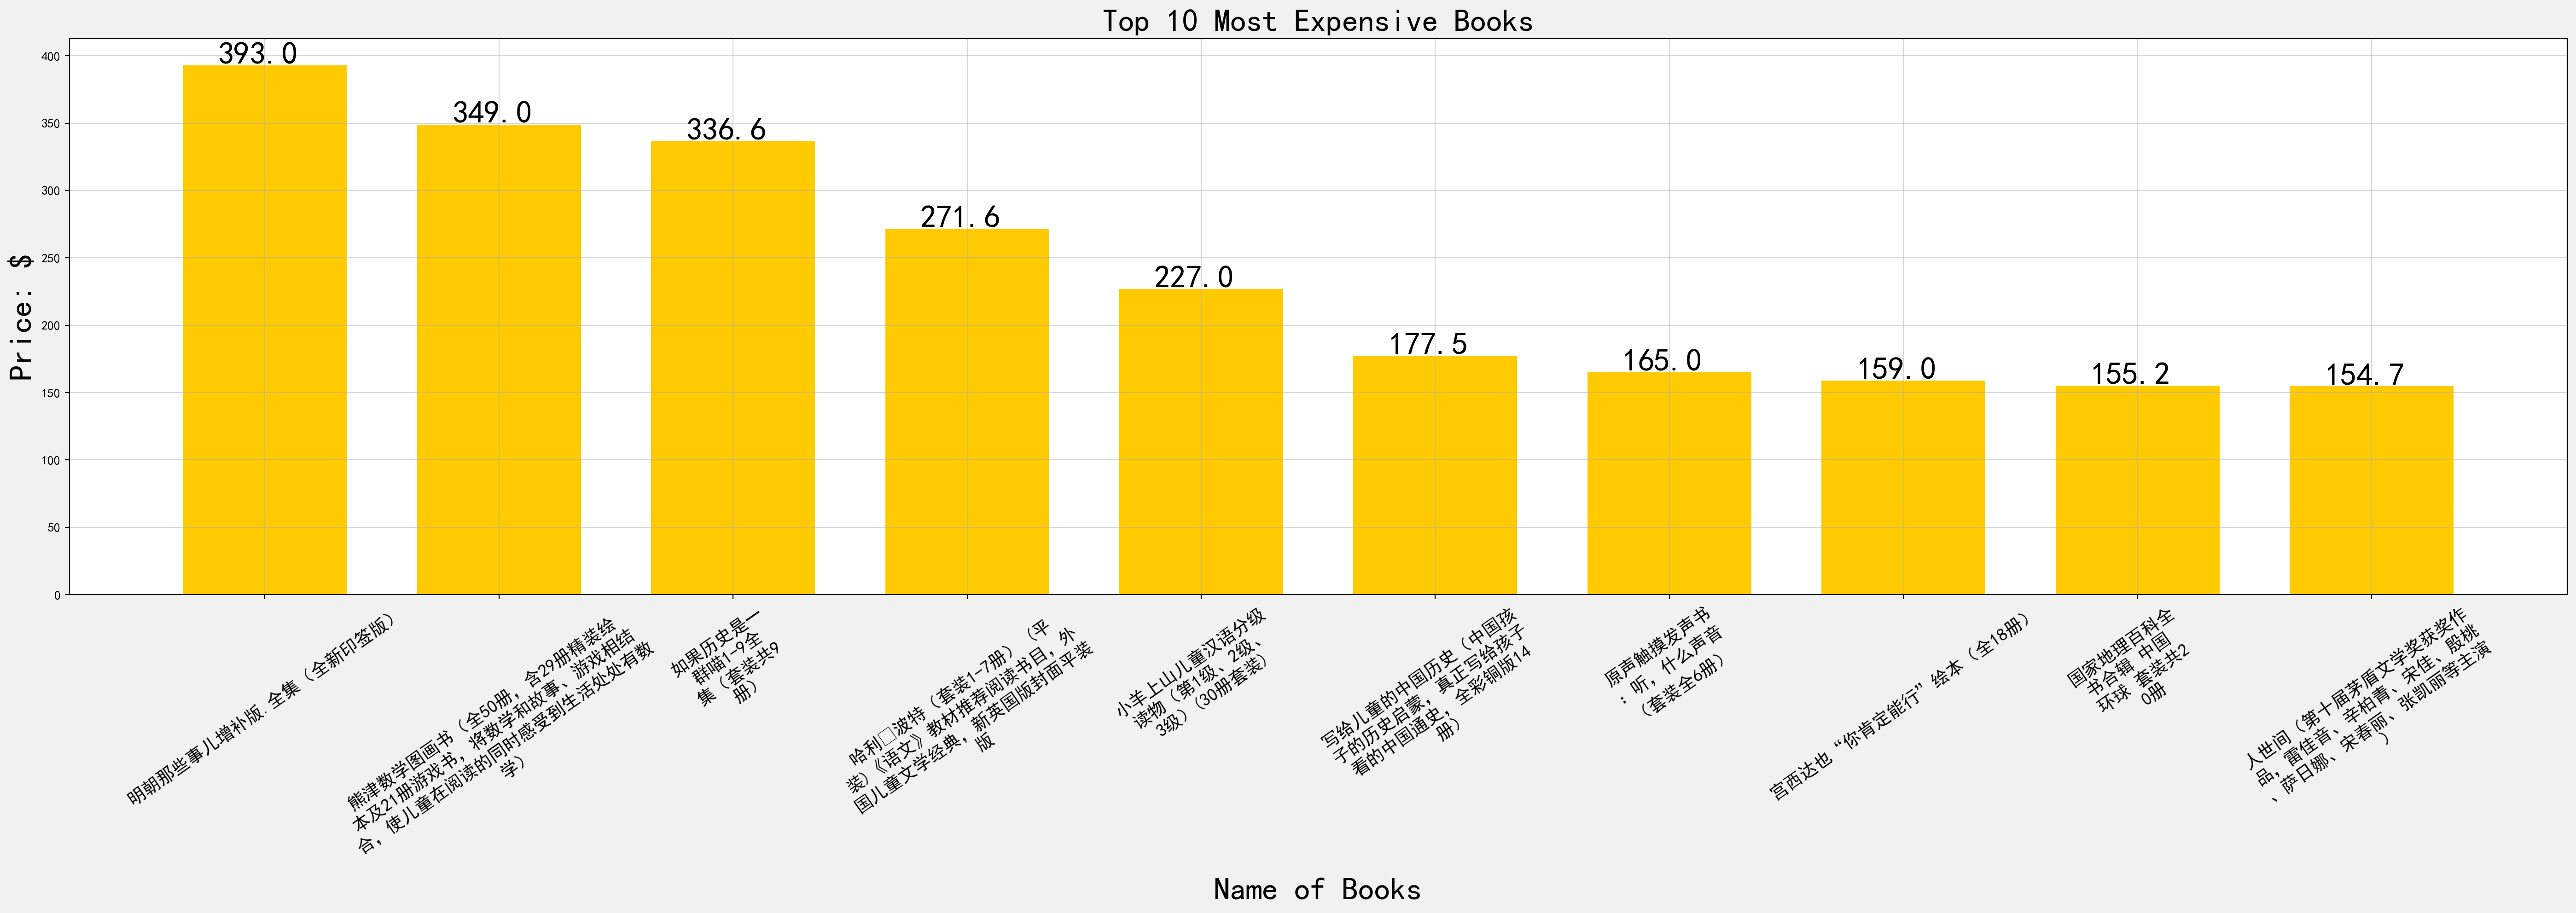

In [95]:
plt.figure(figsize=(35, 8), dpi=200, facecolor='#f1f1f1')
plt.bar(x=price_df['title'].apply(lambda x: x if len(x) < 20
else '\n'.join(x[i:i + len(x) // 3] for i in range(0, len(x), len(x) // 3))),
        height=price_df['price_n'], width=0.7,
        color='#ffcb00')

plt.tick_params(axis='x', rotation=35, labelsize=14)  # 设置 tick 的参数
plt.title('Top 10 Most Expensive Books', fontsize=25)
plt.xlabel('Name of Books', fontsize=25)
plt.ylabel('Price: $', fontsize=25)
plt.grid(True, linestyle="-", alpha=0.5)

for x, price in enumerate(price_df['price_n'].values):
    plt.text(x - 0.2, price + 1, str(price), fontsize=25)

## 3. 书籍评分量

一个作者多部作品上榜

In [75]:
df[df['authors'].duplicated() & (~df[['title', 'authors']].duplicated())]

,title,reviews,recommends(%),authors,publisher,price_n,price_r,weighted_rating
index,,,,,,,,
17,"苍炎.2,飞翔篇",931,99.9,羽生结弦,北京联合出版有限公司,48.9,68.0,99.898390
27,文城（余华新书，时隔8年重磅归来，《活着》之后又一精彩力作）,277205,100.0,余华,北京十月文艺出版社,34.8,59.0,99.999977
39,心安即是归处（季羡林百年生命智慧。央视《朗读者》多次动情朗读本书名篇，贾平凹、白岩松、金庸、...,287524,100.0,季羡林,古吴轩出版社,41.7,49.0,99.999977
44,东野圭吾：解忧杂货店（胡歌、王俊凯、刘昊然倾情推荐，简体中文1000万册纪念版）,2452397,99.7,东野圭吾,南海出版公司,34.8,59.0,99.700003
48,乌合之众 : 大众心理研究（群体心理学创始人古斯塔夫・勒庞代表作之一。极简翻译文风，语言深入...,682078,100.0,古斯塔夫・勒庞,民主与建设出版社,12.3,26.0,99.999991
...,...,...,...,...,...,...,...,...
472,给樱桃以性别（《橘子不是唯・一的水果》姐妹篇，温特森重磅代表作）,7070,100.0,珍妮特・温特森,北京联合出版有限公司,29.5,59.0,99.999090
474,断舍离（经典断舍离，山下英子初版全本）,1085105,99.8,山下英子,广西科学技术出版社,14.4,32.0,99.800003
479,心 稻盛和夫的一生嘱托,169265,100.0,稻盛和夫,人民邮电出版社,29.5,59.0,99.999962


In [77]:
reviewed_df = df.groupby(['authors'],
                         as_index=False)[['weighted_rating', 'reviews']].mean().sort_values(by='reviews',
                                                                                            ascending=False).head(10)
reviewed_df

,authors,weighted_rating,reviews
108,太宰治,99.800002,2.188515e+06
63,加西亚・马尔克斯,99.800002,2.028686e+06
267,简・尼尔森,99.999997,1.889829e+06
375,高铭,99.899999,1.489422e+06
123,安托万・德・圣埃克苏佩里,99.899999,1.476248e+06
347,阿兰德・丹姆,99.600009,1.465698e+06
103,塔拉,99.999995,1.271325e+06
314,蔡崇达,99.899999,1.229592e+06
21,乔安娜柯尔,99.866668,1.161173e+06
154,张嘉骅,99.899999,1.159017e+06


D:\Program Files\Miniconda\envs\project2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


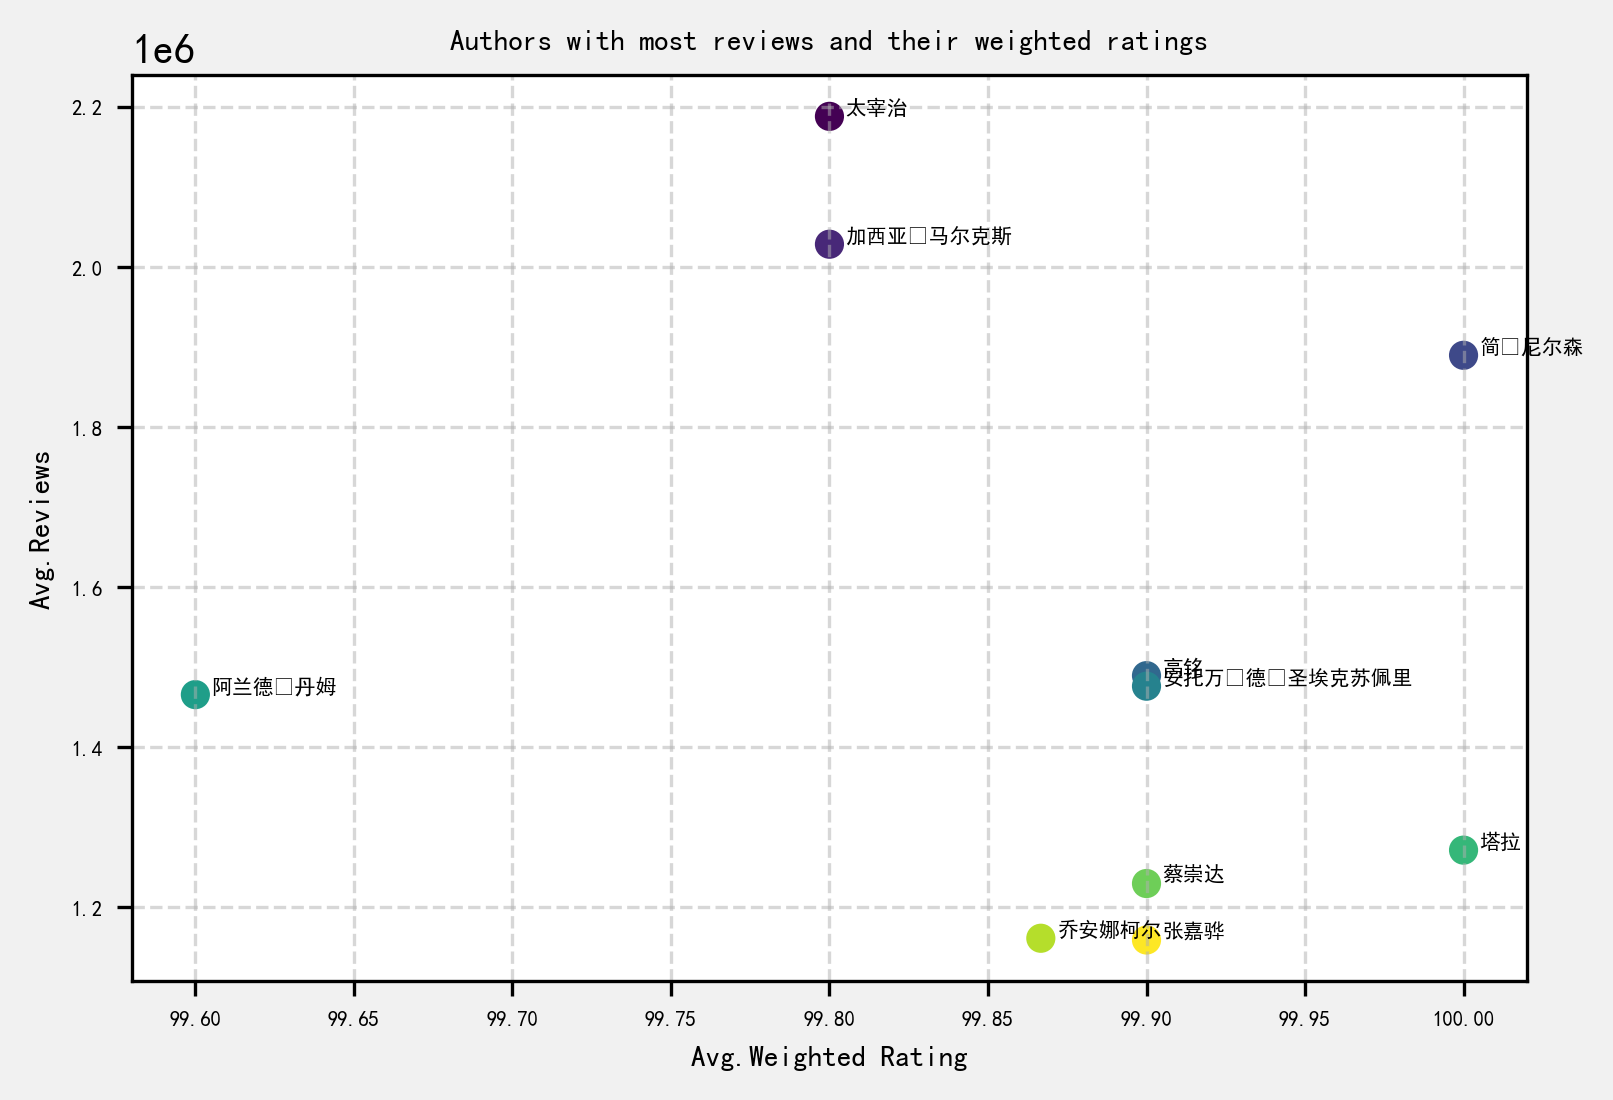

In [94]:
plt.figure(figsize=(6, 4), dpi=300, facecolor='#f1f1f1')
plt.rcParams["font.family"] = "SimHei"

x = reviewed_df['weighted_rating']
y = reviewed_df['reviews']
text = reviewed_df['authors']

plt.scatter(x, y, marker='o', c=[i for i in range(reviewed_df.shape[0])],
            cmap='viridis')

for i in range(reviewed_df.shape[0]):
    plt.annotate(text.iloc[i], xy=(x.iloc[i], y.iloc[i]),
                 xytext=(x.iloc[i] + 0.005, y.iloc[i] + 2500),
                 fontsize=5)

plt.title('Authors with most reviews and their weighted ratings',
          fontsize=7, verticalalignment='baseline')
plt.xlabel('Avg.Weighted Rating', fontsize=7)
plt.ylabel('Avg.Reviews', fontsize=7)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tick_params(labelsize=5)

In [96]:
df.head(10)

,title,reviews,recommends(%),authors,publisher,price_n,price_r,weighted_rating
index,,,,,,,,
1,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,37619,99.9,梁晓声,中国青年出版社,154.7,238.0,99.899958
2,遥远的救世主（天道原著王志文主演电视剧畅销遥远的救世主作者豆豆三部曲之一）,275993,99.8,豆豆,作家出版社,24.0,48.0,99.800012
3,万物小历史 和爸妈读万物科学简史 给孩子的万物科普绘本 成长,58387,100.0,张玉光,北京联合出版有限公司,34.0,40.0,99.999889
4,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,976335,100.0,罗伯特・戴博德,天津人民出版社,26.0,38.0,99.999993
5,被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎,518799,100.0,岸��一郎,机械工业出版社,41.2,55.0,99.999988
6,乌合之众：群体心理研究（精装收藏版）,8691,100.0,古斯塔夫・勒庞,水利水电出版社,21.4,42.8,99.999259
7,次第花开 修订版,526431,100.0,希阿荣博堪布,海南出版社,19.9,39.8,99.999988
8,活着（余华代表作，精装，易烊千玺推荐阅读。当当专享印签藏书票+限量赠珍藏复刻手稿）,631877,100.0,余华,北京十月文艺出版社,31.0,45.0,99.999990
9,法治的细节（罗翔新作，法律随笔，评热点、论法理、聊读书、谈爱情，人间清醒与你坦诚相见）,29911,100.0,罗翔,云南人民出版社,34.0,49.8,99.999784


In [121]:
df1 = df[df['price_n'].astype(float) > 50].count()[0]
df2 = df[df['price_n'].astype(float) <= 50].count()[0]


In [138]:
df3 = pd.Series({'Price above 50': df1, 'Price below 50': df2})
df3

Price above 50     86
Price below 50    414
dtype: int64

Text(0.5, 1.1, 'Price Comparison')

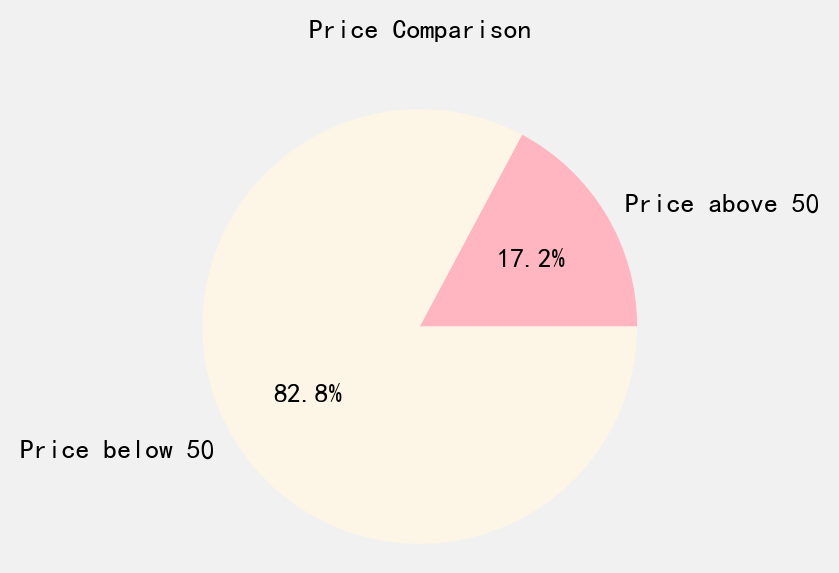

In [142]:
plt.figure(figsize=(5, 3), dpi=200, facecolor='#f1f1f1')
plt.pie(df3, radius=1.2, labels=df3.index, colors=['lightpink',
                                                   'oldlace'], autopct='%1.1f%%')

plt.title('Price Comparison', x=0.5, y=1.1,
          fontsize=10)

In [143]:
df

,title,reviews,recommends(%),authors,publisher,price_n,price_r,weighted_rating
index,,,,,,,,
1,人世间（第十届茅盾文学奖获奖作品，雷佳音、辛柏青、宋佳、殷桃、萨日娜、宋春丽、张凯丽等主演）,37619,99.9,梁晓声,中国青年出版社,154.7,238.0,99.899958
2,遥远的救世主（天道原著王志文主演电视剧畅销遥远的救世主作者豆豆三部曲之一）,275993,99.8,豆豆,作家出版社,24.0,48.0,99.800012
3,万物小历史 和爸妈读万物科学简史 给孩子的万物科普绘本 成长,58387,100.0,张玉光,北京联合出版有限公司,34.0,40.0,99.999889
4,蛤蟆先生去看心理医生（年销200万册！英国经典心理咨询入门书，知名心理学家李松蔚强烈推荐）,976335,100.0,罗伯特・戴博德,天津人民出版社,26.0,38.0,99.999993
5,被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎,518799,100.0,岸��一郎,机械工业出版社,41.2,55.0,99.999988
...,...,...,...,...,...,...,...,...
496,安的种子,210132,99.2,王早早,海燕出版社,13.4,29.8,99.200156
497,米小圈漫画成语（第二辑）（套装共5册）,3332,100.0,北猫,四川少年儿童出版社,60.0,120.0,99.998084
498,人间好玩（当当专享印刷蔡澜先生亲题寄语，“八旬”蔡澜的人生智慧书。汪涵、大张伟赞赏的“师傅”...,56799,100.0,蔡澜,湖南文艺出版社,18.7,48.0,99.999886
